IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

        SLIM Jad & ATBI Tarek Yacine

Ce projet peut être fait en binôme (d'un même groupe). Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - février-mars 2023


<font size="+1" color="RED"><b>Date de rendu : jeudi 22 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les 2 datasets fournis dans le répertoire data-projet:
- les données data-2D.pkl : données en 2 dimensions, 2 labels
- les données data-5D.pkl : données en 5 dimensions, 2 labels

## Travail à faire

Pour chaque ensemble de données:
- les 3 algorithmes d'apprentissage knn, perceptron et perceptron biais doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations doivent fournir une comparaison des taux de bonne classification apprentissage / test avec validation croisée en 10.
- des courbes (coût, poids, variation d'accuracy,...) doivent être fournies pour étudier les modèles construits.

Vos **expérimentations doivent être expliquées**... (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.



Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.
- étude du temps d'exécution.


## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant uniquement ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !



## Lecture des pickles



In [1]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import time
from datetime import datetime as dt
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline  
# un nouvel import utile pour la 3D:
from matplotlib import cm
# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2
# Importation de la librairie pickle
import pickle as pkl
# lecture des donnéees en dimension 2 dans un dataframe pandas
data2D = pkl.load(open('data-projet/data-2D.pkl', 'rb')) 
X2D = np.array(data2D[['x1', 'x2']], dtype=float) # conversion de type pour une meilleure compatibilité
Y2D = np.array(data2D['label'], dtype=float)

# pour les données en dimension 5, la méthode est la même, modifier seulement les noms des colonnes
data5D = pkl.load(open('data-projet/data-5D.pkl', 'rb')) 
X5D = np.array(data5D[['x1', 'x2','x3','x4','x5']], dtype=float) # conversion de type pour une meilleure compatibilité
Y5D = np.array(data5D['label'], dtype=float)

# Les Classifiers

In [2]:
class Classifier:
    def __init__(self, input_dimension):
        raise NotImplementedError("Please Implement this method")
        
    def train(self, desc_set, label_set):     
        raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        raise NotImplementedError("Please Implement this method")

    def accuracy(self, desc_set, label_set):
        acc=0
        for i in range(0,len(desc_set)):
            if(self.predict(desc_set[i]) == label_set[i]):
                acc=acc+1
        
        return acc/len(desc_set)

class ClassifierPerceptron(Classifier):
    def __init__(self, input_dimension, learning_rate, init):
        self.input_dimension = input_dimension
        self.learning_rate = learning_rate
        if init==True:
            self.w = np.zeros(self.input_dimension)
        else:
            self.w = np.random.randn(self.input_dimension)*0.01
            print(self.w)
        self.old_w = self.w.copy()
        self.allw =[self.w.copy()] # stockage des premiers poids
    
    def get_allw(self):
        return self.allw
        
    def train_step(self, desc_set,label_set):
        # Mélange des données
        idxs = np.arange(desc_set.shape[0])
        np.random.shuffle(idxs)
        desc_set = desc_set[idxs]
        label_set = label_set[idxs]
        # Pour chaque exemple
        for i in range(desc_set.shape[0]):
            # Prédiction
            x = desc_set[i]
            y = label_set[i]
            y_pred = self.predict(x)
            # Mise à jour du poids
            if y*y_pred <= 0:
                self.w += self.learning_rate*y*x
                self.allw.append(self.w.copy())
        #raise NotImplementedError("Please Implement this method")
     
    def train(self, desc_set, label_set, nb_max=100, seuil=0.001):   
        diffs = []
        for epoch in range(nb_max):
            # Entrainement d'une étape
            self.train_step(desc_set, label_set)
            
            # Calcul de la différence
            diff_norm = np.linalg.norm(self.w-self.old_w)
            diffs.append(diff_norm)
            
            # Si convergence, arrêt
            if diff_norm < seuil:
                break
                
        return diffs
        #raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        return np.dot(x,self.w)
        #raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        if self.score(x)>=0:
            return 1
        else: 
            return -1
        #raise NotImplementedError("Please Implement this method")

class ClassifierKNN(Classifier):
    def __init__(self, input_dimension, k):
        self.input_dimension=input_dimension
        self.k=k
        self.desc=[]
        self.label=[]
        #raise NotImplementedError("Please Implement this method")
    def predict(self, x):
        if self.score(x)>=0:
            return 1
        else: 
            return -1 
    def score(self,x):
        dist = np.linalg.norm(self.desc-x, axis=1)
        argsort = np.argsort(dist)
        score = np.sum(self.label[argsort[:self.k]] == 1)
        return 2 * (score/self.k -0.5)
        raise NotImplementedError("Please Implement this method")

    def train(self, desc_set, label_set):
        self.desc = desc_set
        self.label = label_set
        #raise NotImplementedError("Please Implement this method")
        
class ClassifierPerceptronBiais(ClassifierPerceptron):

    def __init__(self, input_dimension, learning_rate=0.01, init=True):
        # Appel du constructeur de la classe mère
        super().__init__(input_dimension, learning_rate, init)
        # Affichage pour information (décommentez pour la mise au point)
        #print("Init perceptron biais: w= ",self.w," learning rate= ",learning_rate)
        
    def train_step(self, desc_set, label_set):      
        idxs = np.arange(desc_set.shape[0])
        np.random.shuffle(idxs)
        desc_set = desc_set[idxs]
        label_set = label_set[idxs]
        
        # Pour chaque exemple
        for i in range(desc_set.shape[0]):
            # Prédiction
            x = desc_set[i]
            y = label_set[i]
            y_pred = self.score(x)
            
            # Mise à jour du poids
            if y*y_pred < 1:
                #self.w += self.learning_rate*y*x
                self.w = self.w + self.learning_rate*((y-y_pred)*x)
                self.allw.append(self.w.copy())
        # Ne pas oublier d'ajouter les poids à allw avant de terminer la méthode
        #raise NotImplementedError("Vous devez implémenter cette méthode !")    

# Plot

In [3]:
# plot2DSet:
def plot2DSet(desc, labels):
    desc_negatifs = desc[labels == -1]
    desc_positifs = desc[labels == +1]
    plt.scatter(desc_negatifs[:, 0], desc_negatifs[:, 1], marker='o', color="red")  # 'o' rouge pour la classe -1
    plt.scatter(desc_positifs[:, 0], desc_positifs[:, 1], marker='x', color="blue")  # 'x' bleu pour la classe +1


#  plot_frontiere:
def plot_frontiere(desc_set, label_set, classifier, step=30):
    mmax = desc_set.max(0)
    mmin = desc_set.min(0)
    x1grid, x2grid = np.meshgrid(np.linspace(mmin[0], mmax[0], step), np.linspace(mmin[1], mmax[1], step))
    grid = np.hstack((x1grid.reshape(x1grid.size, 1), x2grid.reshape(x2grid.size, 1)))

    # calcul de la prediction pour chaque point de la grille
    res = np.array([classifier.predict(grid[i, :]) for i in range(len(grid))])
    res = res.reshape(x1grid.shape)
    # tracer des frontieres
    #  colors[0] est la couleur des -1 et colors[1] est la couleur des +1
    plt.contourf(x1grid, x2grid, res, colors=["darksalmon", "skyblue"], levels=[-1000, 0, 1000])


In [4]:
data2D[0:5]

,x1,x2,label
0,0.830557,-2.250314,-1
1,0.627488,-2.533405,-1
2,-1.279837,-1.630564,-1
3,2.002088,-3.415239,-1
4,3.141847,-0.376081,-1


In [5]:
X2D[0:5]

array([[ 0.83055692, -2.25031368],
       [ 0.62748844, -2.53340502],
       [-1.27983681, -1.63056446],
       [ 2.00208794, -3.41523902],
       [ 3.14184699, -0.37608089]])

In [6]:
Y2D[0:5]

array([-1., -1., -1., -1., -1.])

In [7]:
X2D.shape[0]

2000

In [8]:
Y2D.shape[0]

2000

In [9]:
def crossval_strat(X, Y, n_iterations, iteration):
    n_samples = X.shape[0]
    idx = np.arange(n_samples)
    fold_size = n_samples // n_iterations

    start_idx = iteration * fold_size
    end_idx = (iteration + 1) * fold_size

    test_idx = idx[start_idx:end_idx]
    train_idx = np.concatenate((idx[:start_idx], idx[end_idx:]))

    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]
    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    return Xtrain, Ytrain, Xtest, Ytest

# <font color="RED">KNN 2D</font>

Temps d'éxecution total est  74.69156432151794


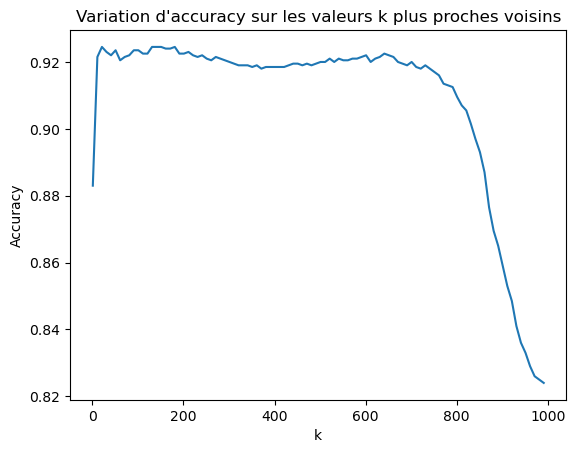

Meilleur accuracy est :  0.9245000000000001 

La valeur de k pour l'accuracy optimal est : 21 



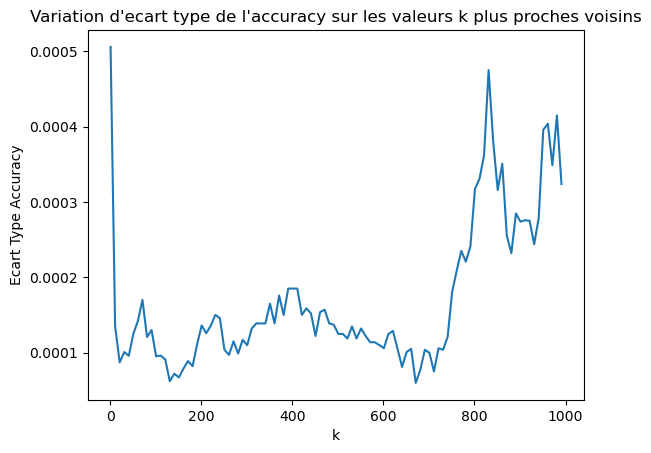

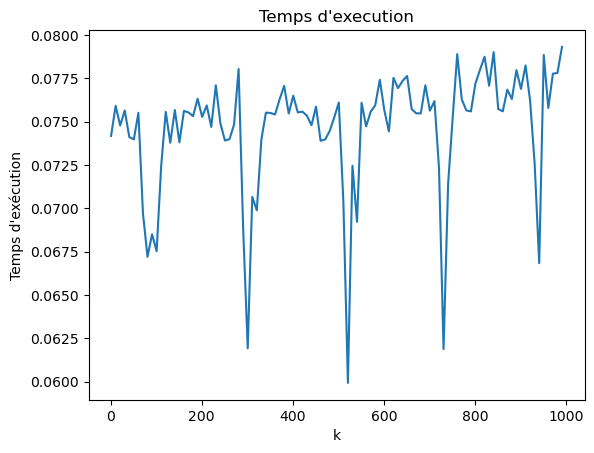

In [26]:
start1 = time.time()
np.random.seed(42)
# on stocke les accuracies dans une liste :
nb_k = []
ecart_k = []
temps_exec = []
# seuil max des valeurs de k à regarder:
seuil_k = len(X2D) // 2

# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,10)]

index = np.random.permutation(len(X2D)) # mélange des index
X2DMelange = X2D[index]
Y2DMelange = Y2D[index]

niter = 10

for k in valeurs_k:
    moy = 0
    ecart_type_moy = 0
    accuracies = []
    un_KNN=ClassifierKNN(2,k)
    temps_exec_bis = []
    for i in range(niter):
        start = time.time()
        Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange, Y2DMelange, niter, i)
        un_KNN.train(Xapp, Yapp)
        accuracies.append(un_KNN.accuracy(Xtest, Ytest))
        temps_exec_bis.append(time.time()-start)
    temps_exec.append(np.mean(temps_exec_bis))
    moy = np.mean(accuracies)
    ecart_type_moy = np.var(accuracies)
    nb_k.append(moy)
    ecart_k.append(ecart_type_moy)

# Temps d'execution
knn_variation_k = time.time() - start1  
print("Temps d'éxecution total est ",knn_variation_k)

# Graphe de variation de k 
plt.plot(valeurs_k, nb_k)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.title("Variation d'accuracy sur les valeurs k plus proches voisins")
plt.show()

# Meilleur k
index_max = nb_k.index(max(nb_k))
k_max = valeurs_k[index_max]
print("Meilleur accuracy est : ",max(nb_k),"\n")
print("La valeur de k pour l'accuracy optimal est :",k_max,"\n")

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_k, ecart_k)  
plt.ylabel("Ecart Type Accuracy")
plt.xlabel("k")
plt.title("Variation d'ecart type de l'accuracy sur les valeurs k plus proches voisins")
plt.show()

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_k,temps_exec)  
plt.ylabel("Temps d'exécution")
plt.xlabel("k")
plt.title("Temps d'execution")
plt.show()


Accuracy pour le k optimal :  0.929
Temps d'execution :  1.2270567417144775


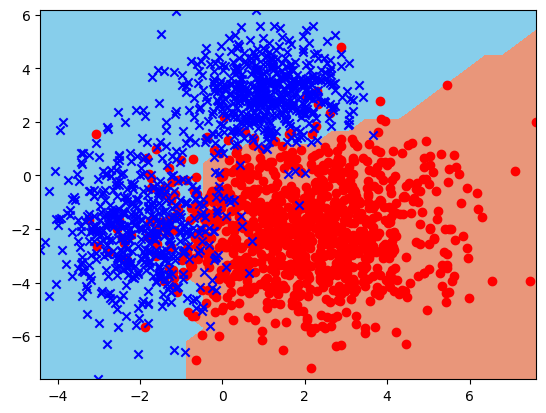

In [27]:
start = time.time()
un_KNN_opt=ClassifierKNN(2,k_max)
un_KNN_opt.train(X2DMelange,Y2DMelange)
plot_frontiere(X2DMelange, Y2DMelange,un_KNN_opt)
plot2DSet(X2DMelange, Y2DMelange)
print("Accuracy pour le k optimal : ",un_KNN_opt.accuracy(X2DMelange,Y2DMelange))
print("Temps d'execution : ",time.time() - start)

# <font color="RED">KNN 5D</font>

Temps d'éxecution total est  86.38146805763245


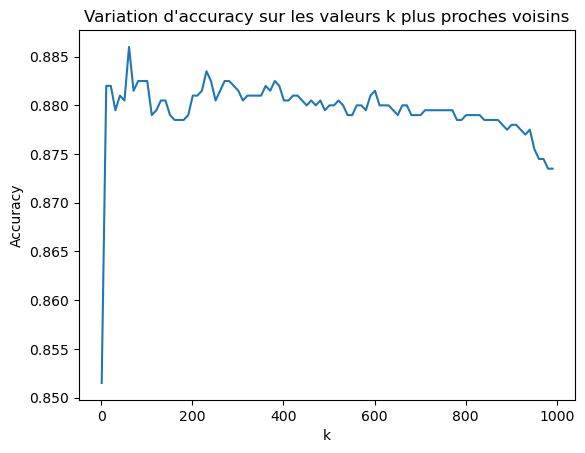

Meilleur accuracy est :  0.8859999999999999 

La valeur de k pour l'accuracy optimal est : 61 



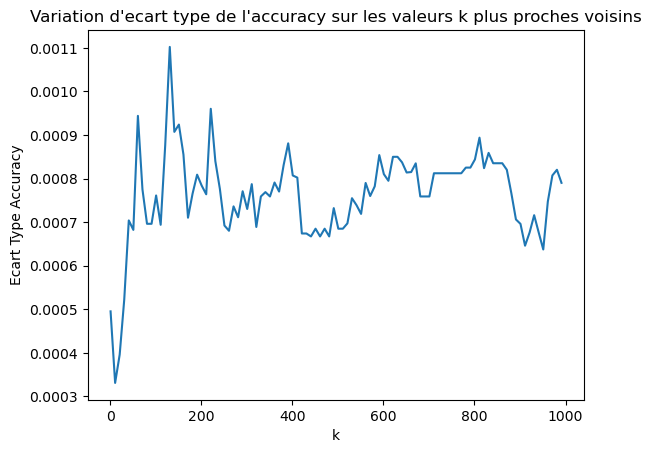

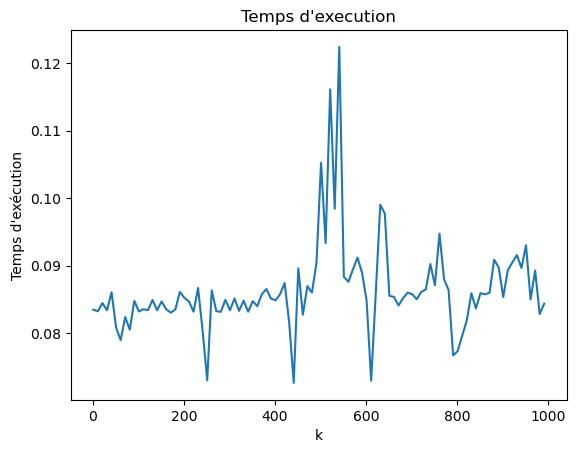

In [28]:
start1_5D = time.time()
np.random.seed(42)
# on stocke les accuracies dans une liste :
nb_k_5D = []
ecart_k_5D = []
temps_exec_5D = []
# seuil max des valeurs de k à regarder:
seuil_k_5D = len(X5D) // 2

# toutes les valeurs de k à regarder:
valeurs_k_5D = [k for k in range(1,seuil_k,10)]

index = np.random.permutation(len(X5D)) # mélange des index
X5DMelange = X5D[index]
Y5DMelange = Y5D[index]

niter = 10

for k in valeurs_k_5D:
    moy_5D = 0
    ecart_type_moy_5D = 0
    accuracies_5D = []
    un_KNN_5D=ClassifierKNN(5,k)
    temps_exec_bis_5D = []
    for i in range(niter):
        start_5D = time.time()
        Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange, Y5DMelange, niter, i)
        un_KNN_5D.train(Xapp, Yapp)
        accuracies_5D.append(un_KNN_5D.accuracy(Xtest, Ytest))
        temps_exec_bis_5D.append(time.time()-start_5D)
    temps_exec_5D.append(np.mean(temps_exec_bis_5D))
    moy_5D = np.mean(accuracies_5D)
    ecart_type_moy_5D = np.var(accuracies_5D)
    nb_k_5D.append(moy_5D)
    ecart_k_5D.append(ecart_type_moy_5D)

# Temps d'execution
knn_variation_k_5D = time.time() - start1_5D  
print("Temps d'éxecution total est ",knn_variation_k_5D)

# Graphe de variation de k 
plt.plot(valeurs_k_5D, nb_k_5D)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.title("Variation d'accuracy sur les valeurs k plus proches voisins")
plt.show()

# Meilleur k
index_max_5D = nb_k_5D.index(max(nb_k_5D))
k_max_5D = valeurs_k_5D[index_max_5D]
print("Meilleur accuracy est : ",max(nb_k_5D),"\n")
print("La valeur de k pour l'accuracy optimal est :",k_max_5D,"\n")

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_k_5D, ecart_k_5D)  
plt.ylabel("Ecart Type Accuracy")
plt.xlabel("k")
plt.title("Variation d'ecart type de l'accuracy sur les valeurs k plus proches voisins")
plt.show()

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_k_5D,temps_exec_5D)  
plt.ylabel("Temps d'exécution")# <font color="RED">KNN 2D</font>
plt.xlabel("k")
plt.title("Temps d'execution")
plt.show()


# <font color="RED">Perceptron 2D</font>

## Evolution de w

### Initialisation à 0 de w

Temps d'execution :  15.610889673233032


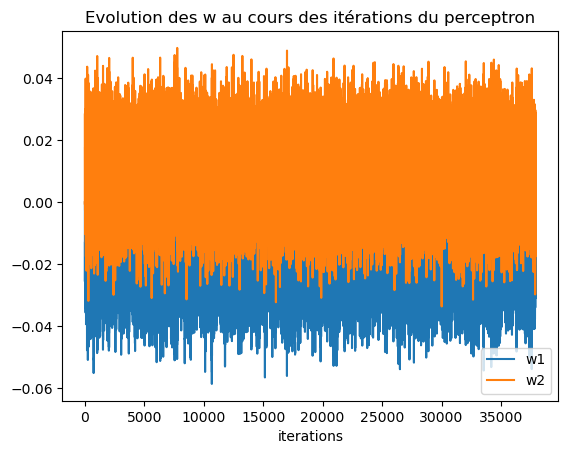

In [16]:
start = time.time()
niter = 10
dim = 2
eps = 5e-3    # learning rate

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange,Y2DMelange, niter, i)
    perceptron_w = ClassifierPerceptron(dim, eps,init = True)
    perceptron_w.train(Xapp, Yapp)
    allw_perc = np.array(perceptron_w.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw_perc[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw_perc[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])


percep_evolution_w_T = time.time() - start
print("Temps d'execution : ",percep_evolution_w_T)

### Initialisation aléatoire de w

[-0.00826687 -0.00276425]
[0.01967537 0.00930545]
[ 0.00912839 -0.00595804]
[-0.00859945 -0.00976784]
[-0.0087379   0.00910823]
[ 0.00164183 -0.01125412]
[-0.01470484  0.00503067]
[0.01002243 0.00562674]
[0.00369784 0.00212933]
[-0.00483359 -0.01731434]
Temps d'execution :  15.84189772605896


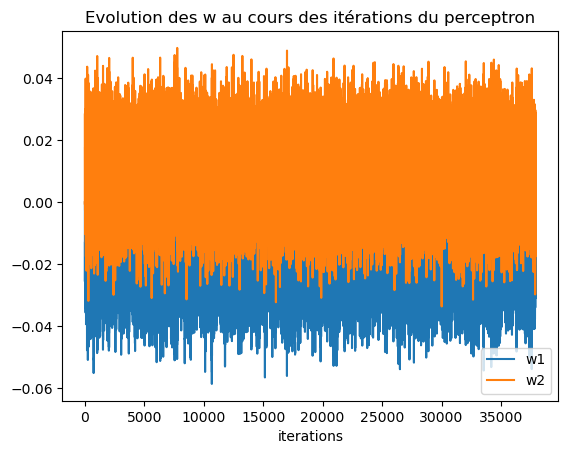

In [17]:
start = time.time()
niter = 10
dim = 2
eps = 5e-3    # learning rate

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange,Y2DMelange, niter, i)
    perceptron_w_F = ClassifierPerceptron(dim, eps,init = False)
    perceptron_w_F.train(Xapp, Yapp)
    allw_perc = np.array(perceptron_w.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw_perc[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw_perc[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])


percep_evolution_w_F = time.time() - start
print("Temps d'execution : ",percep_evolution_w_F)

## Variation d'accuracy par rapport au learning rate

### Initialisation à 0 de w

Temps d'éxecution :  285.95918679237366


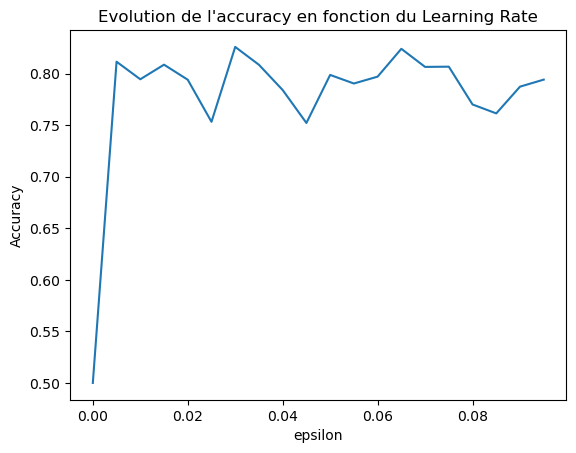

Meilleur accuracy est :  0.826 

La valeur de epsilon pour l'accuracy optimal est : 0.030000000000000002 



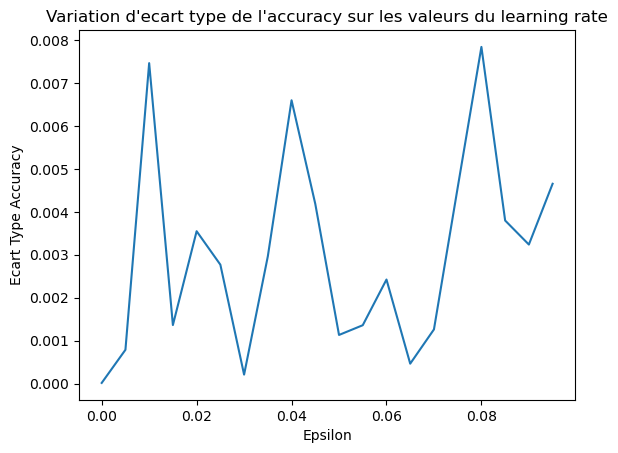

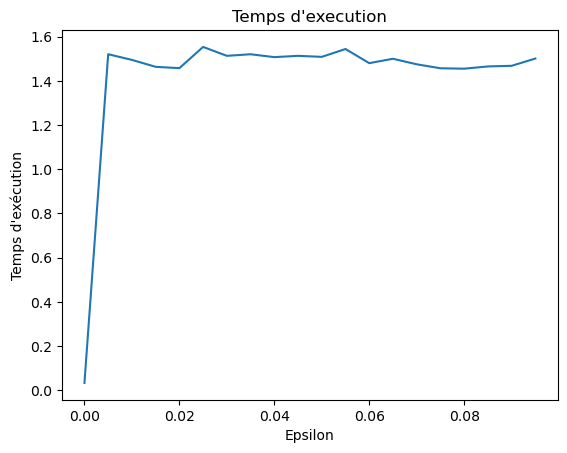

In [32]:
start1 = time.time()
np.random.seed(42)
# on stocke les accuracies et les veleurs de epsilon dans des liste :
nb_e = []
valeurs_e = []
ecart_e = []
temps_exec_e = []
# seuil max des valeurs de k à regarder:
seuil_e = 0.1
niter = 10
e = 0
while e < seuil_e:
    moy = 0
    ecart_type_moy = 0
    accuracies = []
    temps_exec_bis = []
    perceptron3 = ClassifierPerceptron(input_dimension=2,learning_rate=e,init=True)
    for i in range(niter):
        start = time.time()
        Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange, Y2DMelange, niter, i)
        perceptron3.train(Xapp, Yapp)
        accuracies.append(perceptron3.accuracy(Xapp, Yapp))
        temps_exec_bis.append(time.time()-start)
    temps_exec_e.append(np.mean(temps_exec_bis))
    moy = np.mean(accuracies)
    ecart_type_moy = np.var(accuracies)
    nb_e.append(moy)
    valeurs_e.append(e)
    ecart_e.append(ecart_type_moy)
    e += 0.005

print("Temps d'éxecution : ",time.time() - start1)

plt.plot(valeurs_e, nb_e)  
plt.ylabel('Accuracy')
plt.xlabel("epsilon")
plt.title("Evolution de l'accuracy en fonction du Learning Rate")
plt.show()

# Meilleur epsilon
index_max_e = nb_e.index(max(nb_e))
e_max = valeurs_e[index_max_e]
print("Meilleur accuracy est : ",max(nb_e),"\n")
print("La valeur de epsilon pour l'accuracy optimal est :",e_max,"\n")

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_e, ecart_e)  
plt.ylabel("Ecart Type Accuracy")
plt.xlabel("Epsilon")
plt.title("Variation d'ecart type de l'accuracy sur les valeurs du learning rate")
plt.show()

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_e,temps_exec_e)  
plt.ylabel("Temps d'exécution")
plt.xlabel("Epsilon")
plt.title("Temps d'execution")
plt.show()

### Initialisation aléatoire de w

[ 0.00496714 -0.00138264]
[-0.00435711 -0.00032874]
[-0.0092088   0.01804132]
[ 0.00083216 -0.0037829 ]
[0.0202634  0.00492443]
[-0.00437824 -0.00570282]
[-0.01654774  0.01800146]
[0.01641133 0.01922023]
[ 0.01675842 -0.00549986]
[-0.00736898 -0.01409966]
[-0.00290139  0.00329317]
[0.00312643 0.01229317]
[-0.00168252 -0.01349701]
[ 0.00366595 -0.00794394]
[ 0.00079697 -0.00594679]
[ 0.00624908 -0.018116  ]
[-0.00156743 -0.0044485 ]
[-0.00719018  0.00853679]
[ 0.01705084 -0.01368578]
[-0.00450254  0.01055446]
Temps d'éxecution :  291.51263308525085


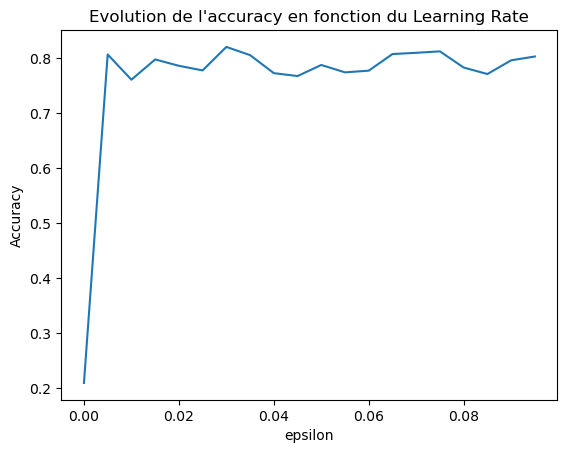

Meilleur accuracy est :  0.820111111111111 

La valeur de epsilon pour l'accuracy optimal est : 0.030000000000000002 



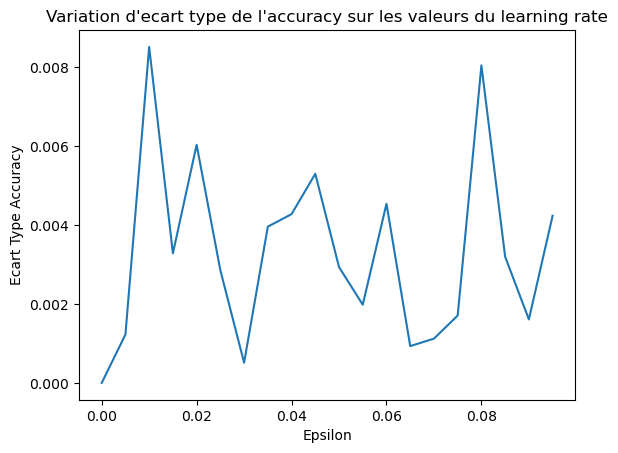

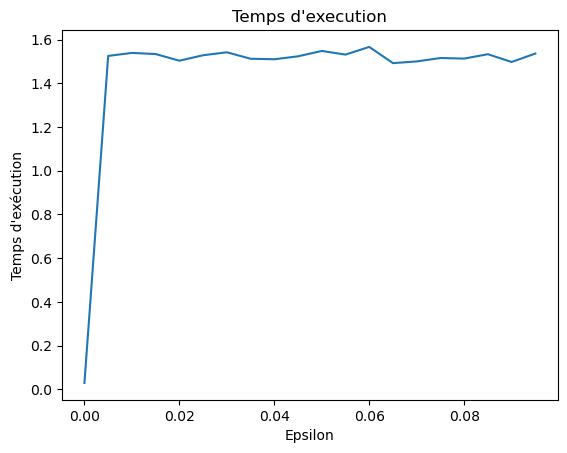

In [34]:
start1 = time.time()
np.random.seed(42)
# on stocke les accuracies et les veleurs de epsilon dans des liste :
nb_e = []
valeurs_e = []
ecart_e = []
temps_exec_e = []
# seuil max des valeurs de k à regarder:
seuil_e = 0.1
niter = 10
e = 0
while e < seuil_e:
    moy = 0
    ecart_type_moy = 0
    accuracies = []
    temps_exec_bis = []
    perceptron3 = ClassifierPerceptron(input_dimension=2,learning_rate=e,init=False)
    for i in range(niter):
        start = time.time()
        Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange, Y2DMelange, niter, i)
        perceptron3.train(Xapp, Yapp)
        accuracies.append(perceptron3.accuracy(Xapp, Yapp))
        temps_exec_bis.append(time.time()-start)
    temps_exec_e.append(np.mean(temps_exec_bis))
    moy = np.mean(accuracies)
    ecart_type_moy = np.var(accuracies)
    nb_e.append(moy)
    valeurs_e.append(e)
    ecart_e.append(ecart_type_moy)
    e += 0.005

print("Temps d'éxecution : ",time.time() - start1)

plt.plot(valeurs_e, nb_e)  
plt.ylabel('Accuracy')
plt.xlabel("epsilon")
plt.title("Evolution de l'accuracy en fonction du Learning Rate")
plt.show()

# Meilleur epsilon
index_max_e = nb_e.index(max(nb_e))
e_max = valeurs_e[index_max_e]
print("Meilleur accuracy est : ",max(nb_e),"\n")
print("La valeur de epsilon pour l'accuracy optimal est :",e_max,"\n")

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_e, ecart_e)  
plt.ylabel("Ecart Type Accuracy")
plt.xlabel("Epsilon")
plt.title("Variation d'ecart type de l'accuracy sur les valeurs du learning rate")
plt.show()

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_e,temps_exec_e)  
plt.ylabel("Temps d'exécution")
plt.xlabel("Epsilon")
plt.title("Temps d'execution")
plt.show()

# <font color="RED">Perceptron 5D</font>

## Evolution de w

### Initialisation à 0 de w 

In [40]:
dim = 5
niter=10
for i in range (niter):
    desc_train, label_train, desc_test, label_test = crossval_strat(X5DMelange,Y5DMelange,niter,i)
    perceptron_w_5D= ClassifierPerceptron(dim,0.001,init=True)
    perceptron_w_5D.train(desc_train, label_train)

print("Accuracy : ", perceptron_w_5D.accuracy(desc_test,label_test))

Accuracy :  0.82


(29997, 5)


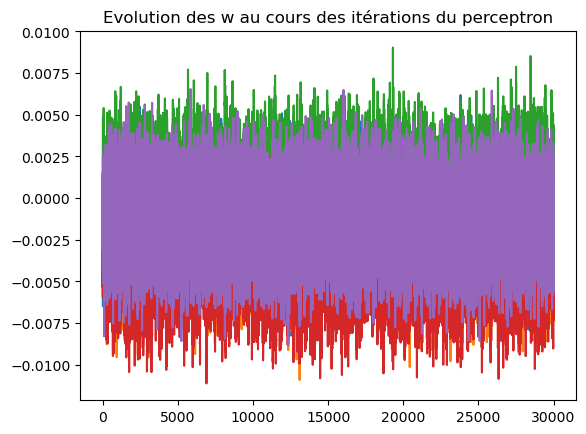

In [41]:
list_allw_5D=np.array(perceptron_w_5D.get_allw())
print(list_allw_5D.shape)
plt.title('Evolution des w au cours des itérations du perceptron')
plt.plot(list_allw_5D)
plt.show()

### Initialisation aléatoire de w 

[-0.01199662 -0.00216114  0.01505613  0.00861743 -0.00518789]
[ 0.01244938 -0.00017457 -0.00306362 -0.00716443 -0.00739977]
[ 0.00864213  0.00990962  0.00512901 -0.00302784 -0.01846196]
[-0.01093562 -0.00853395  0.01181272  0.00896059  0.01327981]
[-0.00673563 -0.00025878 -0.01889006  0.00963953  0.00813819]
[-0.00517629  0.00025708 -0.00153124  0.00713681 -0.00619569]
[-0.00289604 -0.0057458  -0.00521031 -0.01321643  0.00132229]
[-0.00885666 -0.00019414  0.00162121  0.00296073  0.01250045]
[ 0.01436238 -0.01323992 -0.00661742  0.00410979 -0.0108874 ]
[-0.01428159  0.00235568 -0.01735608 -0.00515576  0.01488561]


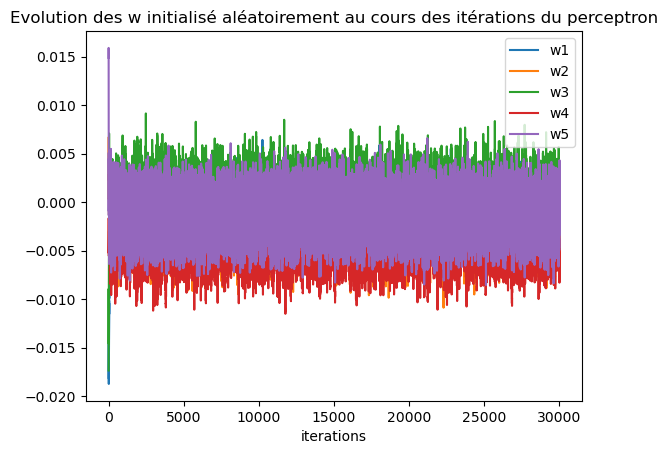

In [42]:
start = time.time()
niter = 10
dim = 5
eps=0.001

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange,X5DMelange, niter, i)
    perceptron_rndm_5D = ClassifierPerceptron(dim,eps,init = False)
    perceptron_rndm_5D.train(desc_train, label_train)
    
allw_perc = np.array(perceptron_rndm_5D.get_allw())
plt.figure()
plt.plot(allw_perc[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw_perc[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.plot(allw_perc[:,2]) # première coordonnée du vecteur poids: w3
plt.plot(allw_perc[:,3]) # deuxième coordonnée du vecteur poids: w4
plt.plot(allw_perc[:,4]) # deuxième coordonnée du vecteur poids: w5


plt.title('Evolution des w initialisé aléatoirement au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2','w3','w4','w5'])

## Variation d'accuracy par rapport au learning rate

### Initialisation à 0 de w 

Temps d'éxecution :  274.7660183906555


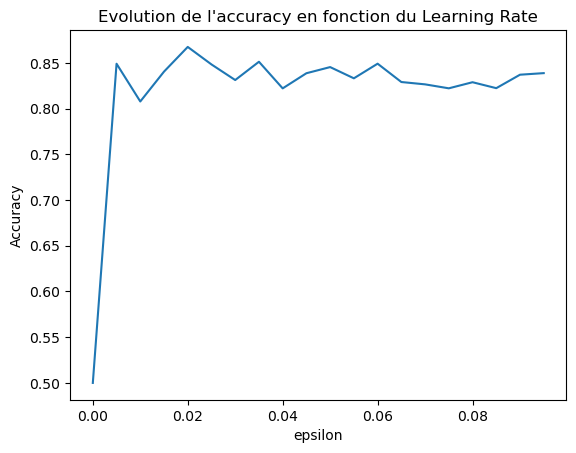

Meilleur accuracy est :  0.8674999999999999 

La valeur de epsilon pour l'accuracy optimal est : 0.02 



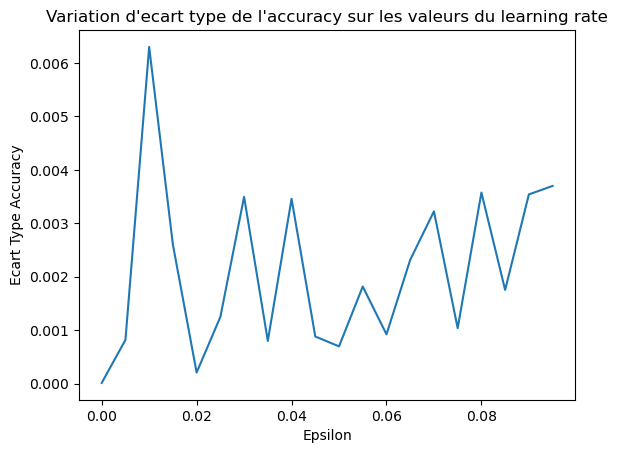

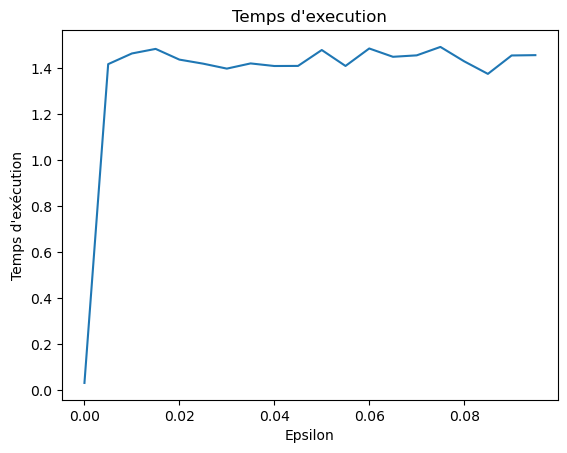

In [43]:
start1_5D = time.time()
# on stocke les accuracies et les veleurs de epsilon dans des liste :
nb_e_5D = []
valeurs_e_5D = []
ecart_e_5D = []
temps_exec_e_5D = []
# seuil max des valeurs de k à regarder:
seuil_e_5D = 0.1
niter = 10
e = 0
while e < seuil_e_5D:
    moy_5D = 0
    ecart_type_moy_5D = 0
    accuracies_5D = []
    temps_exec_bis_5D = []
    perceptron3_5D = ClassifierPerceptron(input_dimension=5,learning_rate=e,init=True)
    for i in range(niter):
        start_5D = time.time()
        Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange, Y5DMelange, niter, i)
        perceptron3_5D.train(Xapp, Yapp)
        accuracies_5D.append(perceptron3_5D.accuracy(Xapp, Yapp))
        temps_exec_bis_5D.append(time.time()-start_5D)
    temps_exec_e_5D.append(np.mean(temps_exec_bis_5D))
    moy_5D = np.mean(accuracies_5D)
    ecart_type_moy_5D = np.var(accuracies_5D)
    nb_e_5D.append(moy_5D)
    valeurs_e_5D.append(e)
    ecart_e_5D.append(ecart_type_moy_5D)
    e += 0.005

print("Temps d'éxecution : ",time.time() - start1_5D)

plt.plot(valeurs_e_5D, nb_e_5D)  
plt.ylabel('Accuracy')
plt.xlabel("epsilon")
plt.title("Evolution de l'accuracy en fonction du Learning Rate")
plt.show()

# Meilleur epsilon
index_max_e_5D = nb_e_5D.index(max(nb_e_5D))
e_max_5D = valeurs_e_5D[index_max_e_5D]
print("Meilleur accuracy est : ",max(nb_e_5D),"\n")
print("La valeur de epsilon pour l'accuracy optimal est :",e_max_5D,"\n")

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_e_5D, ecart_e_5D)  
plt.ylabel("Ecart Type Accuracy")
plt.xlabel("Epsilon")
plt.title("Variation d'ecart type de l'accuracy sur les valeurs du learning rate")
plt.show()

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_e_5D,temps_exec_e_5D)  
plt.ylabel("Temps d'exécution")
plt.xlabel("Epsilon")
plt.title("Temps d'execution")
plt.show()

### Initialisation aléatoire de w 

[-0.00375394 -0.0203355  -0.0111983   0.00584999  0.00797843]
[-0.01390892 -0.00948418 -0.01326092  0.01065518 -0.01174685]
[-0.00155801  0.0091411   0.00678318  0.00954957  0.00316964]
[ 0.00554003 -0.00866712 -0.00832674  0.0090749  -0.00518301]
[ 0.02009404  0.00810915 -0.00296204  0.01490826  0.00886854]
[-0.00137214  0.00255102 -0.00760917  0.01176755  0.00050623]
[-0.00351652  0.00478161 -0.00353352  0.00757136  0.0054135 ]
[ 0.01588629 -0.00447812  0.01454859 -0.01204914 -0.00881698]
[ 0.00661445 -0.00508448 -0.00507767 -0.01218582 -0.00111125]
[ 0.01232588  0.00873907  0.01174045 -0.00209854  0.00702176]
[-0.00019245 -0.00403509  0.00778357 -0.00233523  0.02166652]
[-0.01272038 -0.01859973 -0.00810227 -0.00221984 -0.00478668]
[-0.00214094 -0.0073815   0.00812523  0.01077817  0.00677219]
[-0.00623807  0.01713879  0.00103679 -0.01073039 -0.00102918]
[ 0.01537424 -0.01743446  0.01404941 -0.0066057  -0.0003248 ]
[-0.00885051 -0.00229973 -0.01526514 -0.00116332  0.00174897]
[-0.0060

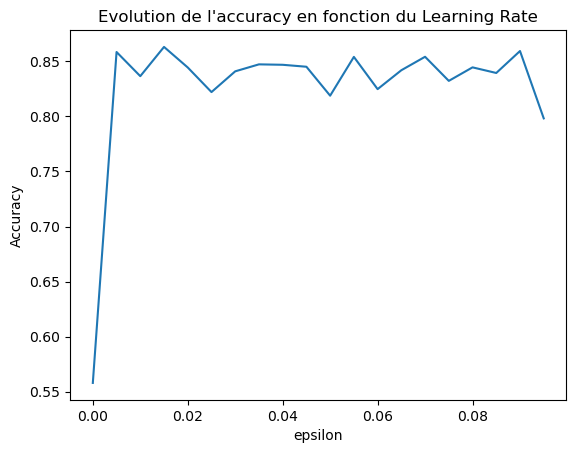

Meilleur accuracy est :  0.863111111111111 

La valeur de epsilon pour l'accuracy optimal est : 0.015 



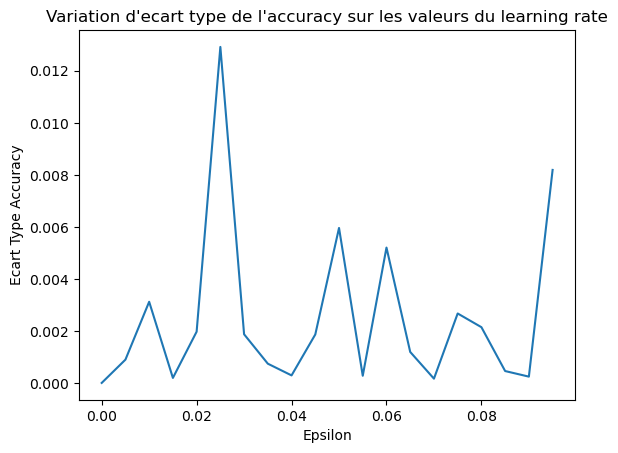

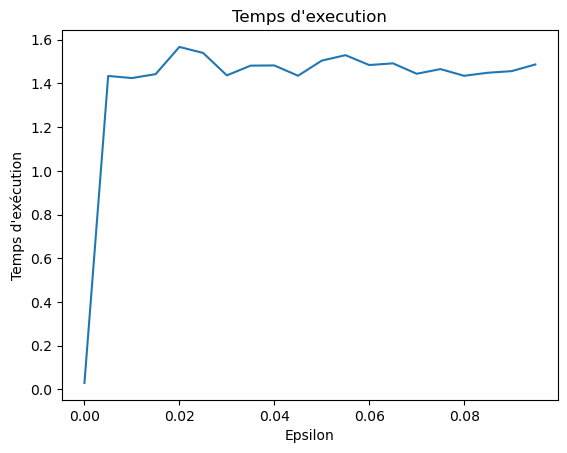

In [44]:
start1_5D = time.time()
# on stocke les accuracies et les veleurs de epsilon dans des liste :
nb_e_5D = []
valeurs_e_5D = []
ecart_e_5D = []
temps_exec_e_5D = []
# seuil max des valeurs de k à regarder:
seuil_e_5D = 0.1
niter = 10
e = 0
while e < seuil_e_5D:
    moy_5D = 0
    ecart_type_moy_5D = 0
    accuracies_5D = []
    temps_exec_bis_5D = []
    perceptron3_5D = ClassifierPerceptron(input_dimension=5,learning_rate=e,init=False)
    for i in range(niter):
        start_5D = time.time()
        Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange, Y5DMelange, niter, i)
        perceptron3_5D.train(Xapp, Yapp)
        accuracies_5D.append(perceptron3_5D.accuracy(Xapp, Yapp))
        temps_exec_bis_5D.append(time.time()-start_5D)
    temps_exec_e_5D.append(np.mean(temps_exec_bis_5D))
    moy_5D = np.mean(accuracies_5D)
    ecart_type_moy_5D = np.var(accuracies_5D)
    nb_e_5D.append(moy_5D)
    valeurs_e_5D.append(e)
    ecart_e_5D.append(ecart_type_moy_5D)
    e += 0.005

print("Temps d'éxecution : ",time.time() - start1_5D)

plt.plot(valeurs_e_5D, nb_e_5D)  
plt.ylabel('Accuracy')
plt.xlabel("epsilon")
plt.title("Evolution de l'accuracy en fonction du Learning Rate")
plt.show()

# Meilleur epsilon
index_max_e_5D = nb_e_5D.index(max(nb_e_5D))
e_max_5D = valeurs_e_5D[index_max_e_5D]
print("Meilleur accuracy est : ",max(nb_e_5D),"\n")
print("La valeur de epsilon pour l'accuracy optimal est :",e_max_5D,"\n")

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_e_5D, ecart_e_5D)  
plt.ylabel("Ecart Type Accuracy")
plt.xlabel("Epsilon")
plt.title("Variation d'ecart type de l'accuracy sur les valeurs du learning rate")
plt.show()

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_e_5D,temps_exec_e_5D)  
plt.ylabel("Temps d'exécution")
plt.xlabel("Epsilon")
plt.title("Temps d'execution")
plt.show()

# <font color="RED">Perceptron BIAIS 2D</font>

## Test de la validation croisée sur Perceptron Biais

### Initialisation à 0 de w

Perf  [0.785, 0.825, 0.825, 0.835, 0.84, 0.855, 0.87, 0.815, 0.825, 0.86]


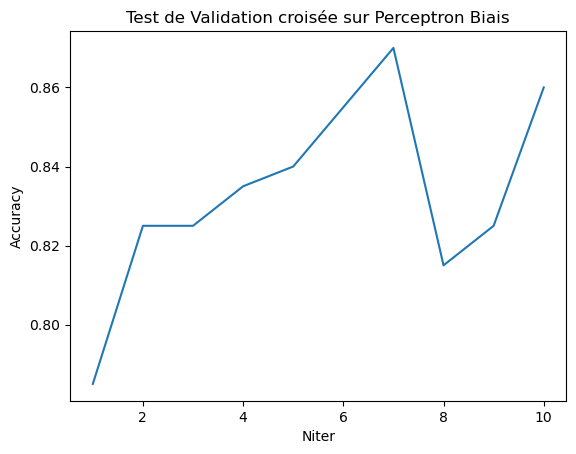

In [45]:
niter = 10
perf = []

# Paramètres pour le perceptron:
dim = 2
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange,Y2DMelange, niter, i)
    perceptron5 = ClassifierPerceptronBiais(dim, eps,init=True)
    perceptron5.train(Xapp, Yapp)
    perf.append(perceptron5.accuracy(Xtest, Ytest))
    
print("Perf ",perf)

plt.plot(range(1,niter+1), perf)  
plt.ylabel('Accuracy')
plt.xlabel("Niter")
plt.title("Test de Validation croisée sur Perceptron Biais")
plt.show()

### Initialisation aléatoire de w

[ 0.00273888 -0.01101115]
[-0.00559419  0.00530779]
[-0.0019831   0.00537441]
[ 0.01119752 -0.00320215]
[ 0.01150853 -0.01260021]
[-0.00409537 -0.00353652]
[0.00699288 0.00039686]
[0.00628829 0.00853719]
[-0.0222161   0.00897355]
[ 0.01598267 -0.00927103]
Perf  [0.805, 0.855, 0.825, 0.83, 0.84, 0.85, 0.86, 0.81, 0.83, 0.84]


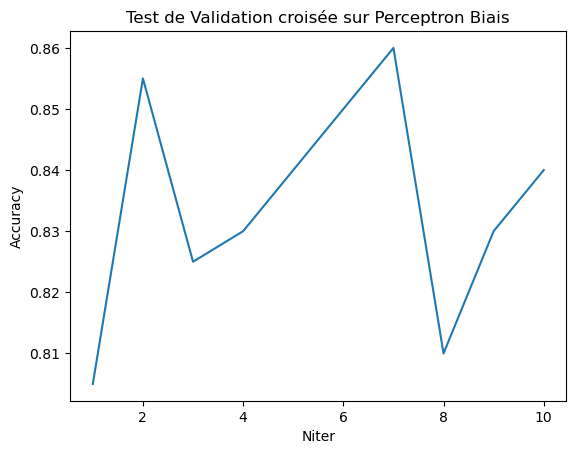

In [46]:
niter = 10
perf = []

# Paramètres pour le perceptron:
dim = 2
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange,Y2DMelange, niter, i)
    perceptron5 = ClassifierPerceptronBiais(dim, eps,init = False)
    perceptron5.train(Xapp, Yapp)
    perf.append(perceptron5.accuracy(Xtest, Ytest))
    
print("Perf ",perf)

plt.plot(range(1,niter+1), perf)  
plt.ylabel('Accuracy')
plt.xlabel("Niter")
plt.title("Test de Validation croisée sur Perceptron Biais")
plt.show()

## Evolution des valeurs de w

### Initialisation à 0 de w

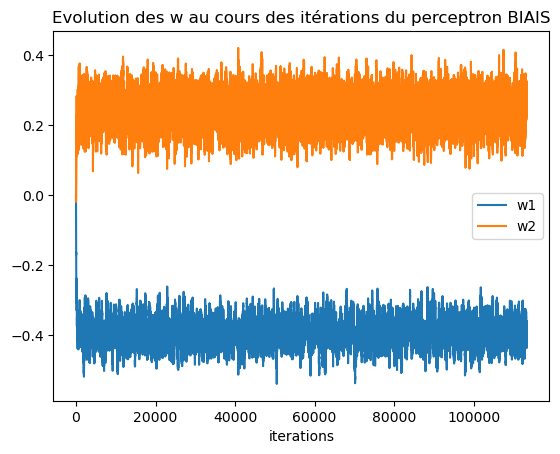

In [49]:
niter = 10
dim = 2
eps = 5e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange,Y2DMelange, niter, i)
    perceptron6 = ClassifierPerceptronBiais(dim, eps,init=True)
    perceptron6.train(Xapp, Yapp)
    allw = np.array(perceptron6.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron BIAIS')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

### Initialisation aléatoire de w

[0.00481667 0.00166746]
[0.00595873 0.00252508]
[-0.01839918 -0.00621116]
[-0.01242782  0.00842778]
[-0.01106921 -0.00443293]
[0.00659726 0.00330223]
[-0.00869813 -0.0082494 ]
[-0.00648649  0.00366027]
[-0.00075348 -0.00389391]
[-0.00545196 -0.0190617 ]


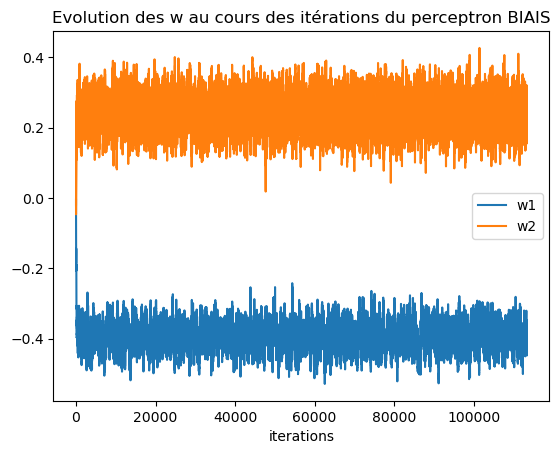

In [47]:
niter = 10
dim = 2
eps = 5e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange,Y2DMelange, niter, i)
    perceptron6 = ClassifierPerceptronBiais(dim, eps,init=False)
    perceptron6.train(Xapp, Yapp)
    allw = np.array(perceptron6.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron BIAIS')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

## Variation d'accuracy par rapport au learning rate

### Initialisation à 0 de w

Temps d'éxecution :  210.79941868782043


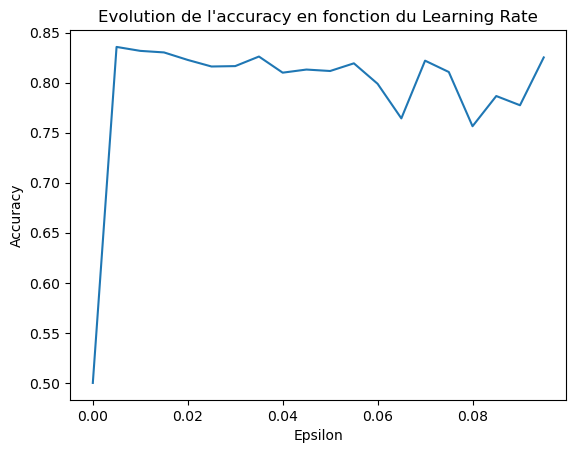

Meilleur accuracy est :  0.8356666666666668 

La valeur de epsilon pour l'accuracy optimal est : 0.005 



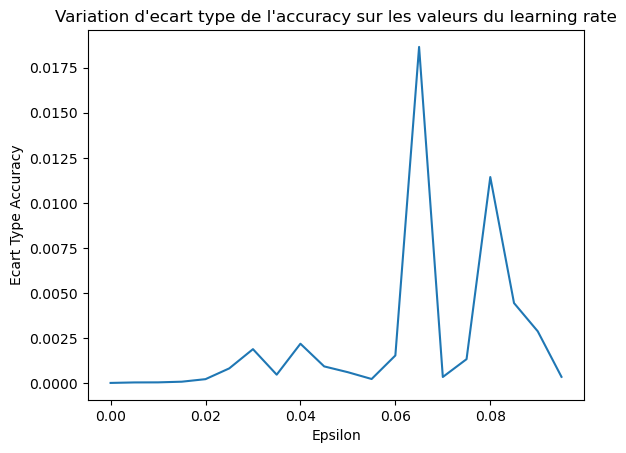

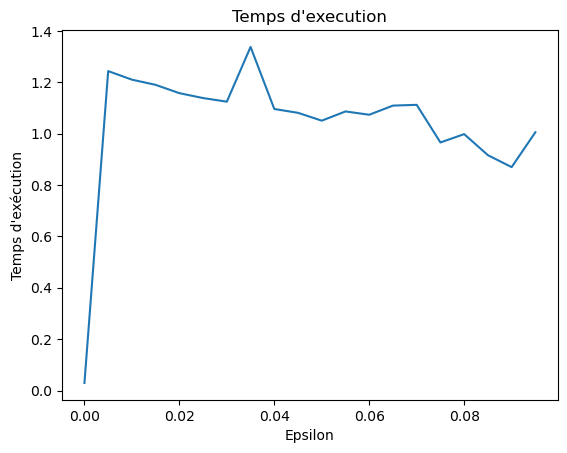

In [53]:
start1 = time.time()
nb_e_biais = []
valeurs_e_biais = []
ecart_e_biais = []
temps_exec_e_biais = []
seuil_e = 0.1
niter = 10
e = 0
while e < seuil_e:
    moy = 0
    accuracies = []
    ecart_type_moy = 0
    temps_exec_bis = []
    perceptron_biais = ClassifierPerceptronBiais(2,e,init=True)
    for i in range(niter):
        start = time.time()
        Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange, Y2DMelange, niter, i)
        perceptron_biais.train(Xapp, Yapp)
        accuracies.append(perceptron_biais.accuracy(Xapp, Yapp))
        temps_exec_bis.append(time.time()-start)
    temps_exec_e_biais.append(np.mean(temps_exec_bis))
    moy = sum(accuracies) / len(accuracies)
    nb_e_biais.append(moy)
    ecart_type_moy = np.var(accuracies)
    valeurs_e_biais.append(e)
    ecart_e_biais.append(ecart_type_moy)
    e += 0.005
print("Temps d'éxecution : ",time.time() - start1)

plt.plot(valeurs_e_biais, nb_e_biais)  
plt.ylabel('Accuracy')
plt.xlabel("Epsilon")
plt.title("Evolution de l'accuracy en fonction du Learning Rate")
plt.show()

# Meilleur epsilon
index_max_e_biais = nb_e_biais.index(max(nb_e_biais))
e_max_biais = valeurs_e[index_max_e_biais]
print("Meilleur accuracy est : ",max(nb_e_biais),"\n")
print("La valeur de epsilon pour l'accuracy optimal est :",e_max_biais,"\n")

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_e_biais, ecart_e_biais)  
plt.ylabel("Ecart Type Accuracy")
plt.xlabel("Epsilon")
plt.title("Variation d'ecart type de l'accuracy sur les valeurs du learning rate")
plt.show()

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_e_biais,temps_exec_e_biais)  
plt.ylabel("Temps d'exécution")
plt.xlabel("Epsilon")
plt.title("Temps d'execution")
plt.show()

### Initialisation aléatoire de w

[0.00514689 0.00831172]
[0.00909066 0.00728112]
[ 0.00647407 -0.00634465]
[-0.01316217  0.00103962]
[-0.00892891 -0.00157208]
[-0.00335417 -0.00821382]
[-0.00399714  0.00098783]
[-0.0056246  0.0051647]
[-0.00345545  0.0073526 ]
[-0.0010319  -0.00719377]
[-0.01120719  0.02865462]
[-0.01795572 -0.00755865]
[-0.00593901  0.01555501]
[-0.00215017  0.02816603]
[0.00141951 0.00192079]
[0.01161139 0.0152567 ]
[-4.22735680e-05 -1.34127231e-03]
[-0.01755856  0.00697427]
[ 0.02797674 -0.00360715]
[-0.00073832  0.01066491]
Temps d'éxecution :  351.9336287975311


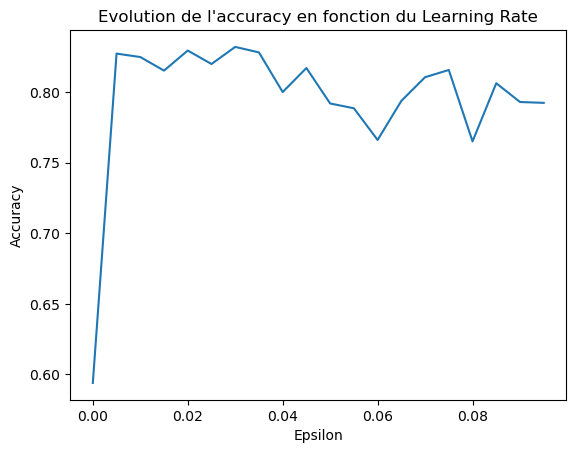

Meilleur accuracy est :  0.8319444444444445 

La valeur de epsilon pour l'accuracy optimal est : 0.030000000000000002 



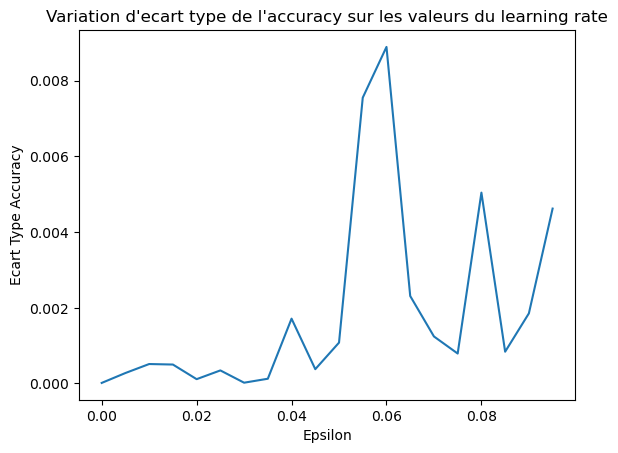

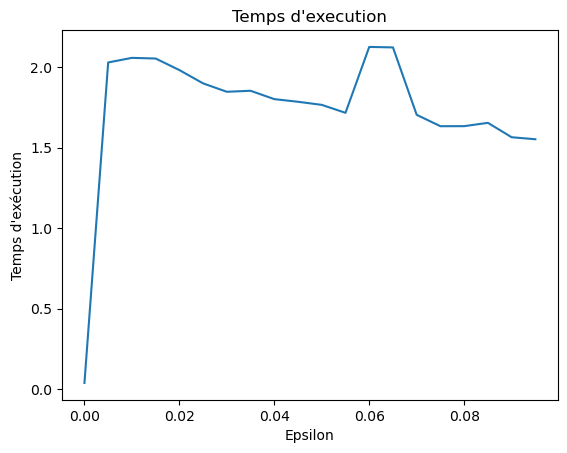

In [55]:
start1 = time.time()
nb_e_biais = []
valeurs_e_biais = []
ecart_e_biais = []
temps_exec_e_biais = []
seuil_e = 0.1
niter = 10
e = 0
while e < seuil_e:
    moy = 0
    accuracies = []
    ecart_type_moy = 0
    temps_exec_bis = []
    perceptron_biais = ClassifierPerceptronBiais(2,e,init=False)
    for i in range(niter):
        start = time.time()
        Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange, Y2DMelange, niter, i)
        perceptron_biais.train(Xapp, Yapp)
        accuracies.append(perceptron_biais.accuracy(Xapp, Yapp))
        temps_exec_bis.append(time.time()-start)
    temps_exec_e_biais.append(np.mean(temps_exec_bis))
    moy = sum(accuracies) / len(accuracies)
    nb_e_biais.append(moy)
    ecart_type_moy = np.var(accuracies)
    valeurs_e_biais.append(e)
    ecart_e_biais.append(ecart_type_moy)
    e += 0.005
print("Temps d'éxecution : ",time.time() - start1)

plt.plot(valeurs_e_biais, nb_e_biais)  
plt.ylabel('Accuracy')
plt.xlabel("Epsilon")
plt.title("Evolution de l'accuracy en fonction du Learning Rate")
plt.show()

# Meilleur epsilon
index_max_e_biais = nb_e_biais.index(max(nb_e_biais))
e_max_biais = valeurs_e[index_max_e_biais]
print("Meilleur accuracy est : ",max(nb_e_biais),"\n")
print("La valeur de epsilon pour l'accuracy optimal est :",e_max_biais,"\n")

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_e_biais, ecart_e_biais)  
plt.ylabel("Ecart Type Accuracy")
plt.xlabel("Epsilon")
plt.title("Variation d'ecart type de l'accuracy sur les valeurs du learning rate")
plt.show()

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_e_biais,temps_exec_e_biais)  
plt.ylabel("Temps d'exécution")
plt.xlabel("Epsilon")
plt.title("Temps d'execution")
plt.show()

## Fonction Cout pour le meilleur Epsilon

### Initialisation à 0 de w

Text(0.5, 1.0, 'Évolution du coût au cours des itérations')

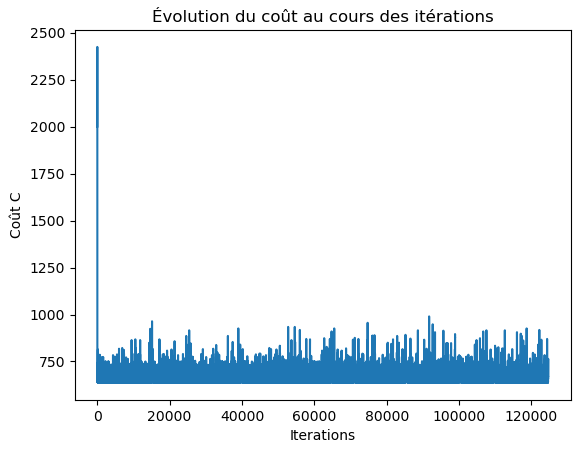

In [77]:
dim = 2
eps = e_max_biais

perceptron_conv = ClassifierPerceptronBiais(dim,eps,init=True)

perceptron_conv.train(X2DMelange,Y2DMelange)

allw_perceptron = np.array(perceptron_conv.get_allw())

C = []
for i in range(len(allw_perceptron)):
    w = allw_perceptron[i]
    x = X2DMelange
    y = Y2DMelange
    y_pred = np.sign(np.dot(x, w))
    c = np.sum(np.maximum(0, 1 - y_pred * y))  # calcul du coût
    C.append(c)

# Tracer l'évolution du coût C
plt.plot(C)
plt.xlabel('Iterations')
plt.ylabel('Coût C')
plt.title('Évolution du coût au cours des itérations')

### Initialisation aléatoire de w

[0.0116893  0.00462617]


Text(0.5, 1.0, 'Évolution du coût au cours des itérations')

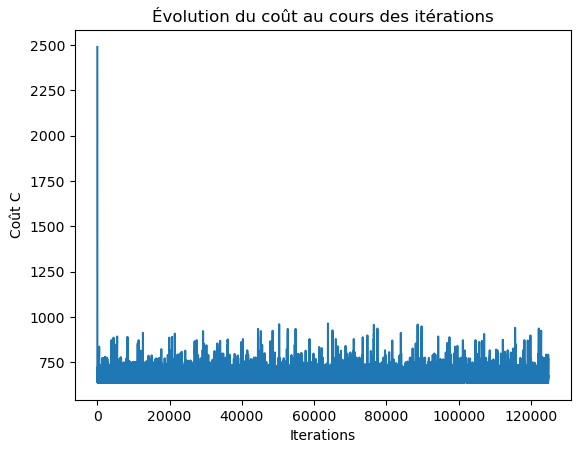

In [78]:
dim = 2
eps = e_max_biais

perceptron_conv = ClassifierPerceptronBiais(dim,eps,init=False)

perceptron_conv.train(X2DMelange,Y2DMelange)

allw_perceptron = np.array(perceptron_conv.get_allw())

C = []
for i in range(len(allw_perceptron)):
    w = allw_perceptron[i]
    x = X2DMelange
    y = Y2DMelange
    y_pred = np.sign(np.dot(x, w))
    c = np.sum(np.maximum(0, 1 - y_pred * y))  # calcul du coût
    C.append(c)

# Tracer l'évolution du coût C
plt.plot(C)
plt.xlabel('Iterations')
plt.ylabel('Coût C')
plt.title('Évolution du coût au cours des itérations')

# <font color="RED">Perceptron BIAIS 5D</font>

## Test de la validation croisée sur Perceptron Biais

### Initialisation à 0 de w

Perf  [0.87, 0.88, 0.89, 0.94, 0.855, 0.875, 0.885, 0.87, 0.91, 0.91]


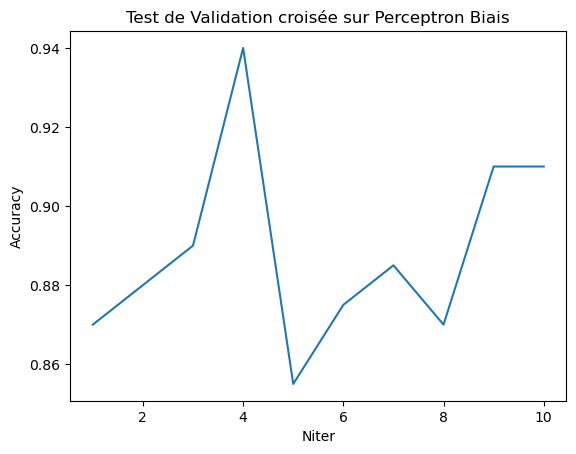

In [56]:
niter = 10
perf = []

# Paramètres pour le perceptron:
dim = 5
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange,Y5DMelange, niter, i)
    perceptron5 = ClassifierPerceptronBiais(dim, eps,init=True)
    perceptron5.train(Xapp, Yapp)
    perf.append(perceptron5.accuracy(Xtest, Ytest))
    
print("Perf ",perf)

plt.plot(range(1,niter+1), perf)  
plt.ylabel('Accuracy')
plt.xlabel("Niter")
plt.title("Test de Validation croisée sur Perceptron Biais")
plt.show()

### Initialisation aléatoire de w

[ 4.74626484e-03 -1.79411668e-02  1.30860995e-02 -7.65021906e-05
 -4.54455526e-03]
[ 0.00054547 -0.00416508 -0.00687699 -0.00424902  0.01764299]
[ 0.00481608  0.00253793 -0.00584004 -0.00147998  0.00535444]
[-0.0034128   0.01246927 -0.00829009 -0.0073257  -0.01145256]
[-0.0028471  -0.00249075 -0.01182475  0.00059675  0.00655481]
[ 0.00855979 -0.01493122  0.00358638 -0.00940603  0.00342176]
[-0.01210989 -0.00709016 -0.00080759  0.00407741 -0.00458699]
[ 0.01544253 -0.00569866  0.00780855 -0.01069291 -0.00547469]
[-0.00844597  0.01170146  0.00804782  0.00874989  0.0056419 ]
[ 0.00449714 -0.00906299 -0.01262341  0.0019148   0.01302241]
Perf  [0.495, 0.38, 0.255, 0.755, 0.605, 0.555, 0.79, 0.515, 0.265, 0.36]


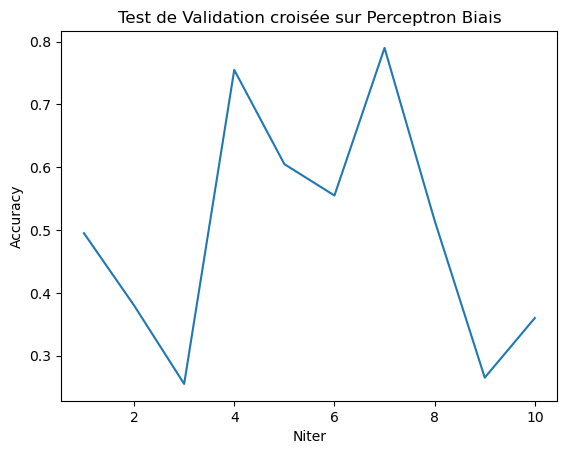

In [57]:
niter = 10
perf = []

# Paramètres pour le perceptron:
dim = 5
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange,Y5DMelange, niter, i)
    perceptron5 = ClassifierPerceptronBiais(dim, eps,init=False)
    perf.append(perceptron5.accuracy(Xtest, Ytest))
    
print("Perf ",perf)

plt.plot(range(1,niter+1), perf)  
plt.ylabel('Accuracy')
plt.xlabel("Niter")
plt.title("Test de Validation croisée sur Perceptron Biais")
plt.show()

## Evolution des valeurs de w

### Initialisation à 0 de w

In [58]:
dim = 5
niter=10
for i in range (niter):
    desc_train, label_train, desc_test, label_test = crossval_strat(X5DMelange,Y5DMelange,niter,i)
    perceptron_w_5D_biais= ClassifierPerceptronBiais(dim,0.001,init=True)
    perceptron_w_5D_biais.train(desc_train, label_train)

print("Accuracy : ", perceptron_w_5D_biais.accuracy(desc_test,label_test))

Accuracy :  0.905


(95726, 5)


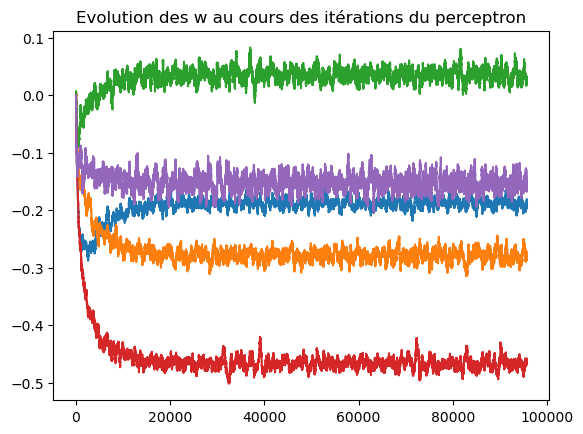

In [59]:
list_allw_5D=np.array(perceptron_w_5D_biais.get_allw())
print(list_allw_5D.shape)
plt.title('Evolution des w au cours des itérations du perceptron')
plt.plot(list_allw_5D)
plt.show()

### Initialisation aléatoire de w

[-0.01025209 -0.00024498  0.01288313  0.01732004  0.00820427]
[ 0.00584463 -0.01406775  0.00802301 -0.00489175  0.0034701 ]
[-0.00937192 -0.00759005  0.00569269  0.0173281   0.00635514]
[-0.00063666  0.01575398 -0.00530841 -0.00135187  0.01696149]
[ 0.00152722 -0.00666536 -0.00624633 -0.01218599  0.01322285]
[-0.01856855 -0.00372551  0.0026941  -0.00267175  0.00368084]
[ 0.00924853 -0.0076297   0.00626855  0.00199822  0.01100576]
[-0.01603554 -0.00553134 -0.01205725 -0.00276874  0.01512015]
[ 0.00581536 -0.00975237  0.01739574 -0.01517948 -0.00468704]
[ 0.00790585  0.00952212 -0.00627234 -0.02073018  0.00326203]


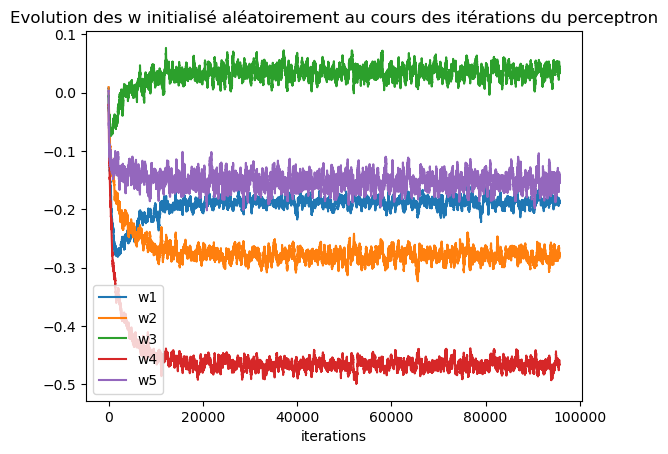

In [60]:
start = time.time()
niter = 10
dim = 5
eps=0.001

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange,Y5DMelange, niter, i)
    perceptron_rndm_5D_biais = ClassifierPerceptronBiais(dim,eps,init = False)
    perceptron_rndm_5D_biais.train(desc_train, label_train)
    
allw_perc = np.array(perceptron_rndm_5D_biais.get_allw())
plt.figure()
plt.plot(allw_perc[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw_perc[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.plot(allw_perc[:,2]) # première coordonnée du vecteur poids: w3
plt.plot(allw_perc[:,3]) # deuxième coordonnée du vecteur poids: w4
plt.plot(allw_perc[:,4]) # deuxième coordonnée du vecteur poids: w5


plt.title('Evolution des w initialisé aléatoirement au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2','w3','w4','w5'])

## Variation d'accuracy par rapport au learning rate

### Initialisation à 0 de w

Temps d'éxecution :  341.8843500614166


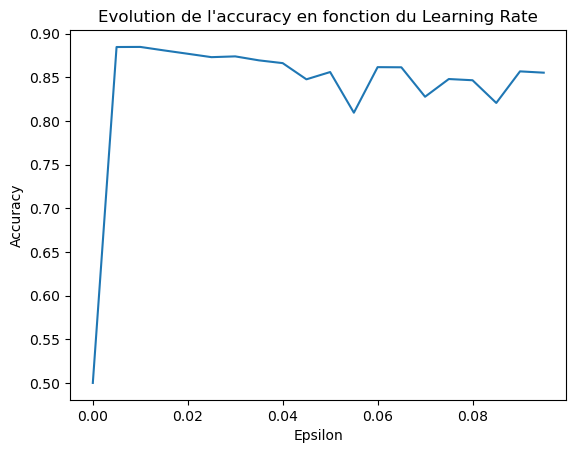

Meilleur accuracy est :  0.8848333333333332 

La valeur de epsilon pour l'accuracy optimal est : 0.01 



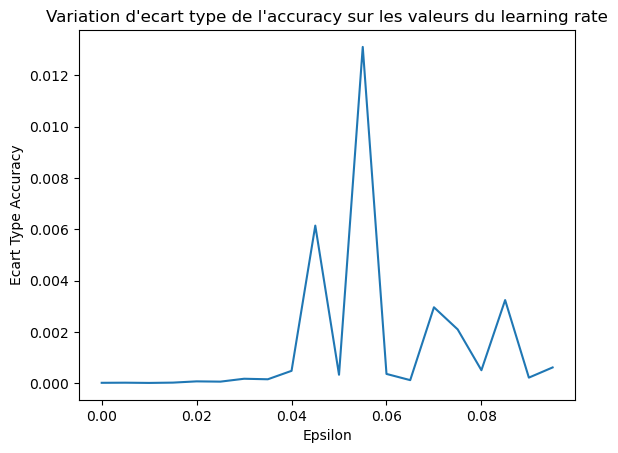

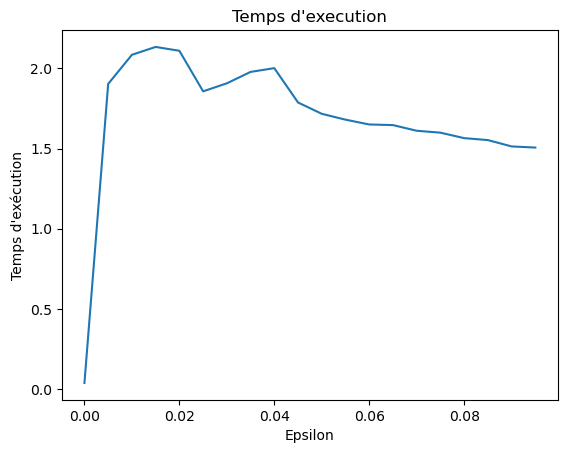

In [68]:
start1 = time.time()
nb_e_biais = []
valeurs_e_biais = []
ecart_e_biais = []
temps_exec_e_biais = []
seuil_e = 0.1
niter = 10
e = 0
while e < seuil_e:
    moy = 0
    accuracies = []
    ecart_type_moy = 0
    temps_exec_bis = []
    perceptron_biais = ClassifierPerceptronBiais(5,e,init=True)
    for i in range(niter):
        start = time.time()
        Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange, Y5DMelange, niter, i)
        perceptron_biais.train(Xapp, Yapp)
        accuracies.append(perceptron_biais.accuracy(Xapp, Yapp))
        temps_exec_bis.append(time.time()-start)
    temps_exec_e_biais.append(np.mean(temps_exec_bis))
    moy = sum(accuracies) / len(accuracies)
    nb_e_biais.append(moy)
    ecart_type_moy = np.var(accuracies)
    valeurs_e_biais.append(e)
    ecart_e_biais.append(ecart_type_moy)
    e += 0.005
print("Temps d'éxecution : ",time.time() - start1)

plt.plot(valeurs_e_biais, nb_e_biais)  
plt.ylabel('Accuracy')
plt.xlabel("Epsilon")
plt.title("Evolution de l'accuracy en fonction du Learning Rate")
plt.show()

# Meilleur epsilon
index_max_e_biais = nb_e_biais.index(max(nb_e_biais))
e_max_biais = valeurs_e[index_max_e_biais]
print("Meilleur accuracy est : ",max(nb_e_biais),"\n")
print("La valeur de epsilon pour l'accuracy optimal est :",e_max_biais,"\n")

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_e_biais, ecart_e_biais)  
plt.ylabel("Ecart Type Accuracy")
plt.xlabel("Epsilon")
plt.title("Variation d'ecart type de l'accuracy sur les valeurs du learning rate")
plt.show()

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_e_biais,temps_exec_e_biais)  
plt.ylabel("Temps d'exécution")
plt.xlabel("Epsilon")
plt.title("Temps d'execution")
plt.show()

### Initialisation aléatoire de w

[-0.00085739  0.00163818  0.01563322 -0.01898189 -0.00604024]
[ 0.0038318  -0.00373038  0.00315668  0.01827205  0.00489695]
[-0.00774516  0.00998759 -0.01366477 -0.00039827 -0.00318139]
[ 0.00067296  0.00872241 -0.00916643 -0.00195353 -0.00376955]
[ 0.00230714 -0.00397071 -0.00073232 -0.0152646   0.00488609]
[ 0.01198068  0.0024512  -0.00430342  0.00174137 -0.00514802]
[-0.0007329   0.01146736  0.01194881 -0.00724338  0.01458175]
[ 0.00637353 -0.00108461 -0.00634657 -0.00845289 -0.0064699 ]
[-0.0020801   0.00889331 -0.00734934  0.01418382 -0.00320843]
[ 0.00514469 -0.0141806   0.00520846  0.01144151  0.01217013]
[-0.01337251  0.00311801 -0.00892863  0.01396355  0.00270445]
[ 0.01481332  0.00753852 -0.01009149  0.00054963  0.00664865]
[ 0.01232033 -0.01355201 -0.002936   -0.01233355 -0.00050818]
[-0.00470878  0.01000851 -0.01941065 -0.00068659  0.00076466]
[ 0.00253138 -0.00778157  0.00174601  0.00839909  0.00411424]
[-0.0019987   0.01146621  0.01587658 -0.00419162  0.00064483]
[-0.0114

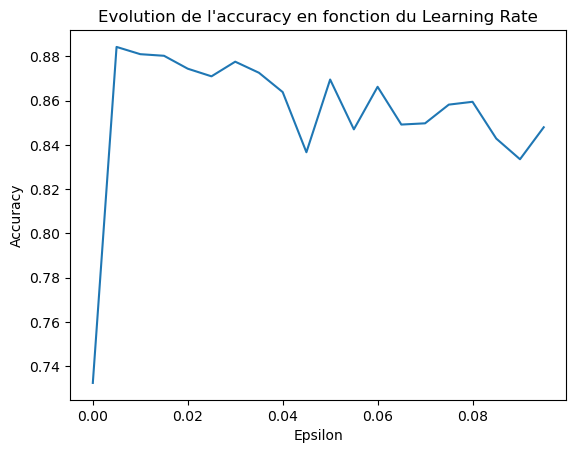

Meilleur accuracy est :  0.8842222222222222 

La valeur de epsilon pour l'accuracy optimal est : 0.005 



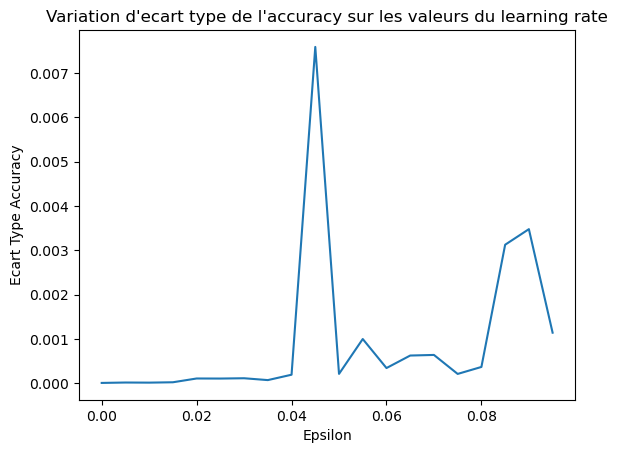

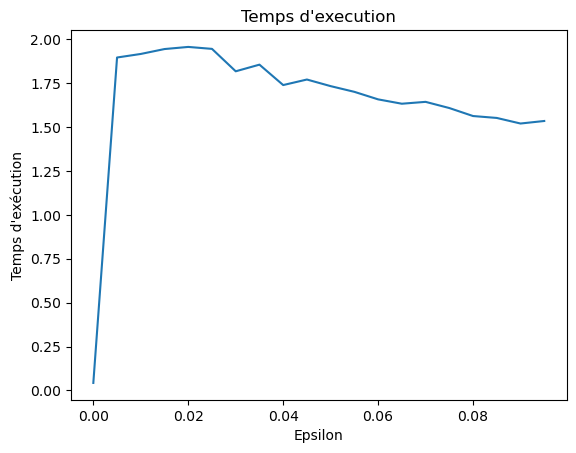

In [70]:
start1 = time.time()
nb_e_biais = []
valeurs_e_biais = []
ecart_e_biais = []
temps_exec_e_biais = []
seuil_e = 0.1
niter = 10
e = 0
while e < seuil_e:
    moy = 0
    accuracies = []
    ecart_type_moy = 0
    temps_exec_bis = []
    perceptron_biais = ClassifierPerceptronBiais(5,e,init=False)
    for i in range(niter):
        start = time.time()
        Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange, Y5DMelange, niter, i)
        perceptron_biais.train(Xapp, Yapp)
        accuracies.append(perceptron_biais.accuracy(Xapp, Yapp))
        temps_exec_bis.append(time.time()-start)
    temps_exec_e_biais.append(np.mean(temps_exec_bis))
    moy = sum(accuracies) / len(accuracies)
    nb_e_biais.append(moy)
    ecart_type_moy = np.var(accuracies)
    valeurs_e_biais.append(e)
    ecart_e_biais.append(ecart_type_moy)
    e += 0.005
print("Temps d'éxecution : ",time.time() - start1)

plt.plot(valeurs_e_biais, nb_e_biais)  
plt.ylabel('Accuracy')
plt.xlabel("Epsilon")
plt.title("Evolution de l'accuracy en fonction du Learning Rate")
plt.show()

# Meilleur epsilon
index_max_e_biais = nb_e_biais.index(max(nb_e_biais))
e_max_biais = valeurs_e[index_max_e_biais]
print("Meilleur accuracy est : ",max(nb_e_biais),"\n")
print("La valeur de epsilon pour l'accuracy optimal est :",e_max_biais,"\n")

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_e_biais, ecart_e_biais)  
plt.ylabel("Ecart Type Accuracy")
plt.xlabel("Epsilon")
plt.title("Variation d'ecart type de l'accuracy sur les valeurs du learning rate")
plt.show()

# Courbe d'ecart Type des accuracies par rapport 
plt.plot(valeurs_e_biais,temps_exec_e_biais)  
plt.ylabel("Temps d'exécution")
plt.xlabel("Epsilon")
plt.title("Temps d'execution")
plt.show()

## Fonction Cout pour le meilleur Epsilon

Text(0.5, 1.0, 'Évolution du coût au cours des itérations')

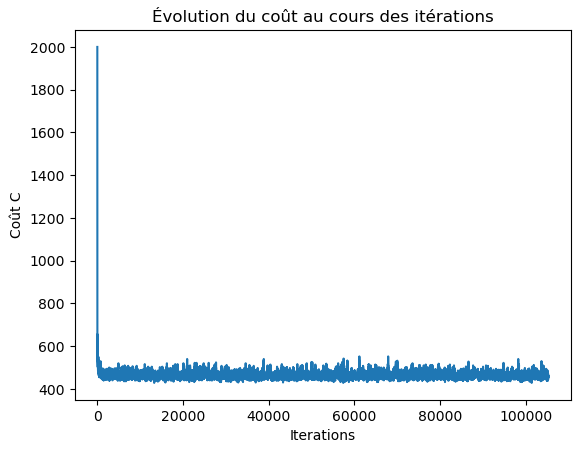

In [79]:
dim = 5
eps = 0.005

perceptron_conv_5D = ClassifierPerceptronBiais(dim,eps,init=True)

perceptron_conv_5D.train(X5DMelange,Y5DMelange)

allw_perceptron_5D = np.array(perceptron_conv_5D.get_allw())

C_5D = []
for i in range(len(allw_perceptron_5D)):
    w_5D = allw_perceptron_5D[i]
    x_5D = X5DMelange
    y_5D = Y5DMelange
    y_pred_5D = np.sign(np.dot(x_5D, w_5D))
    c_5D = np.sum(np.maximum(0, 1 - y_pred_5D * y_5D))  # calcul du coût
    C_5D.append(c_5D)

# Tracer l'évolution du coût C
plt.plot(C_5D)
plt.xlabel('Iterations')
plt.ylabel('Coût C')
plt.title('Évolution du coût au cours des itérations')

# <font color="RED">Synthèse et Analyse</font>

## De manière général et en termes de Performances

**Les classifiers KNN** (K-nearest neighbors) et Perceptron sont deux algorithmes d'apprentissage supervisé utilisés pour la classification. Cependant, ils diffèrent dans leur approche pour la classification des données.

Le classifier KNN fonctionne en trouvant les K points de données les plus proches de la nouvelle observation, puis en attribuant à cette observation la classe la plus fréquente parmi les K voisins. Le choix de la valeur de K peut affecter les performances du classifier, car une valeur trop petite peut entraîner une sensibilité excessive aux bruits et une valeur trop grande peut conduire à des résultats moins précis.

**Le perceptron**, quant à lui, est un algorithme linéaire qui utilise une fonction d'activation pour convertir une somme pondérée des entrées en une sortie binaire. L'apprentissage du perceptron se fait en ajustant les poids des entrées pour minimiser l'erreur de classification.

**Le perceptron biais** est une version améliorée du perceptron qui ajoute une entrée de biais à l'algorithme, ce qui permet de déplacer la ligne de décision pour mieux séparer les classes.

**En termes de performances**, le classifier KNN est souvent plus précis que le perceptron pour des ensembles de données de petite à moyenne taille. Cependant, le KNN peut être beaucoup plus lent à classer les nouvelles observations que le perceptron, car il doit calculer la distance entre les nouvelles observations et toutes les données de formation. En revanche, le perceptron est plus rapide pour les grands ensembles de données, mais peut nécessiter plus d'itérations pour converger vers une solution précise.

En résumé, le choix entre le classifier KNN et le perceptron (ou le perceptron biais) dépend de la taille de l'ensemble de données, de la complexité de la frontière de décision et de la précision souhaitée.

## 2D ou 5D ?

**Perceptron 2D**:
On constate dans le perceptron les valeurs de W1 au cours des iteration est de -0.02 tandis que w2 est d’environ 0.02. On obtient des résultats similaires lorsque w est choisi aléatoirement. Train accuracy commence par une valeur de 0.86, puis redescend rapidement  jusqu'à 0,71 après 4 à 5 itérations puis termine à 0,81. En revanche, test accuracy commence à 0.83, elle atteint son minimum a la 4 eme itération avec 0,70 puis remonte et termine à 0.83 après 10 itérations

Lorsque w est choisi aléatoirement on voit un changement drastique dans ces résultats. Test accuracy commence à 0.82 et termine à la même valeurs mais varie beaucoup au milieu. Train accuracy commence à 0.78 et termine à 0,84 et effectue les mêmes variations.

Ensuite, on a étudié l'Évolution de l'accuracy en fonction du Learning Rate et on conclut que 0.83 est la meilleure accuracy atteinte avec un learning rate optimal de 0,02. Lorsque w est choisi aléatoirement, on a 0,82 comme accuracy pour un learning rate de 0,01.


**Perceptron 5d:**
On constate dans le perceptron les valeurs de 
W1 au cours des iteration varie entre -0,004 et 0,002 , 
w2 est entre d’environ -0.006 et 0
w3est entre d’environ 0,004 et -0,002
w4 est entre d’environ -0.007 et 0
w5 est entre d’environ -0,006 et 0,004. 

Train accuracy commence par une valeur de 0.87, puis redescend rapidement  jusqu'à 0,75 après 4 à 5 itérations puis termine à 0,87. En revanche, test accuracy commence à 0.90, elle atteint son minimum a la 4 eme itération avec 0,72 puis remonte et termine à 0.85 après 10 itérations

Lorsque w est choisi aléatoirement on voit un changement drastique dans ces résultats. Train accuracy commence à 0.82 et termine à 0.85 mais varie beaucoup au milieu. Test accuracy commence à 0.82 et termine à 0,875 et effectue les mêmes variations.

Ensuite, on a étudié l'Évolution de l'accuracy en fonction du Learning Rate et on conclut que 0.87 est la meilleure accuracy atteinte avec un learning rate optimal de 0,05. Lorsque w est choisi aléatoirement, on a 0,86 comme accuracy pour un learning rate de 0,035.

**Perceptron biais 2d:**
On a étudié la variation de l’accuracy selon l'itération (Test de Validation croisée sur Perceptron Biais). Lorsque I=1, accuracy est égal à 0.83 et à i=10 accuracy est égal à 0.88 donc elle augmente au cours des itérations.
On constate dans le perceptron biais que les valeurs de W1 varient entre -0.4 et -0.2  tandis que w2 est autour de 0.02 et 0.04. On obtient des résultats similaires lorsque w est choisi aléatoirement. 

l'Évolution de l'accuracy en fonction du Learning Rate présente ces résultats : 0.83 est la meilleure accuracy atteinte avec un learning rate optimal de 0,01. 

**Perceptron Biais 5d**:

On a aussi étudié la variation de l’accuracy selon l'itération (Test de Validation croisée sur Perceptron Biais). Lorsque I=1, accuracy est égal à 0.89 et à i=10 accuracy est égal à 0.90 donc contrairement au résultat précédent, accuracy reste inchangée après 10 iteration. Cependant au cours des itérations, accuracy a varié légèrement
On constate dans le perceptron les valeurs de 
W1 : -0,2
w2 : -0,7
W3 : 0,2
w4 : -1,1
W5 : -0,2

l'Évolution de l'accuracy en fonction du Learning Rate présente ces résultats : 0.88 est la meilleure accuracy atteinte avec un learning rate optimal de 0,01. Ces valeurs sont très similaires aux valeurs du perceptron biais 5d.

## Temps d'éxécution  

Le temps d'exécution des **classifiers KNN** et **Perceptron** dépendent de plusieurs facteurs tels que la taille de l'ensemble de données, la complexité de la frontière de décision, le nombre de voisins pour KNN et le nombre d'itérations pour le Perceptron.

En général, le temps d'exécution du **classifier KNN** augmente linéairement avec la taille de l'ensemble de données et le nombre de voisins choisi, car il doit calculer la distance entre chaque nouvelle observation et tous les points de données de formation pour chaque prédiction. Cela peut rendre le KNN très lent pour des ensembles de données volumineux, surtout si la distance utilisée pour la classification est complexe.

Le temps d'exécution du **Perceptron** dépend également du nombre d'itérations nécessaires pour converger vers une solution précise. Dans le pire des cas, le Perceptron peut nécessiter un nombre exponentiel d'itérations pour trouver une solution optimale, mais dans la plupart des cas, il converge rapidement. En général, le Perceptron est plus rapide que le KNN pour les grands ensembles de données.

Cependant, il est important de noter que la vitesse d'exécution ne doit pas être le seul critère pour choisir entre ces deux algorithmes. La précision et la qualité de la solution sont également des facteurs clés à prendre en compte.

##  Précision et Qualité de la solution

En termes de précision et de qualité de solution, la performance des classifiers KNN et Perceptron dépendent également de plusieurs facteurs tels que la nature de l'ensemble de données, la distribution des classes, la taille de l'ensemble de données et la complexité de la frontière de décision.

En général, **le classifier KNN** a une bonne précision pour les ensembles de données de petite à moyenne taille, surtout si la frontière de décision est complexe ou non linéaire. Cependant, le KNN peut être sensible aux bruits ou aux valeurs aberrantes dans les données, ce qui peut affecter la qualité de la solution.

**Le Perceptron**, quant à lui, est un algorithme linéaire qui peut être moins précis que le KNN pour les ensembles de données non linéaires ou avec des classes qui se chevauchent. Cependant, le Perceptron est plus résistant aux bruits et aux valeurs aberrantes que le KNN, car il est basé sur une fonction linéaire qui minimise l'erreur de classification.

**Le Perceptron biais** est une version améliorée du Perceptron qui ajoute une entrée de biais à l'algorithme, ce qui permet de déplacer la ligne de décision pour mieux séparer les classes. Cela peut améliorer la précision et la qualité de la solution pour les ensembles de données non linéaires ou avec des classes qui se chevauchent.

En résumé, le choix entre le classifier KNN et le Perceptron (ou le Perceptron biais) dépend de la nature de l'ensemble de données et de la complexité de la frontière de décision. Le KNN peut être plus précis pour les ensembles de données non linéaires ou complexes, mais il peut être sensible aux bruits. Le Perceptron est plus rapide et résistant aux bruits, mais il peut être moins précis pour les ensembles de données non linéaires ou avec des classes qui se chevauchent. Le Perceptron biais peut améliorer la précision et la qualité de la solution pour ces types d'ensembles de données.

**En Conclusion, le choix entre le classifier KNN et le perceptron (ou le perceptron biais) dépend de la taille de l'ensemble de données, de la complexité de la frontière de décision et de la précision souhaitée.**